In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.fakeflares import aflare

import os
CWD = "/".join(os.getcwd().split("/")[:-2])

import pytest

from funcs.model import daylength, on_off, model, lambert, dot_ensemble

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

### Plots 

Text(0, 0.5, 'latitude [deg]')

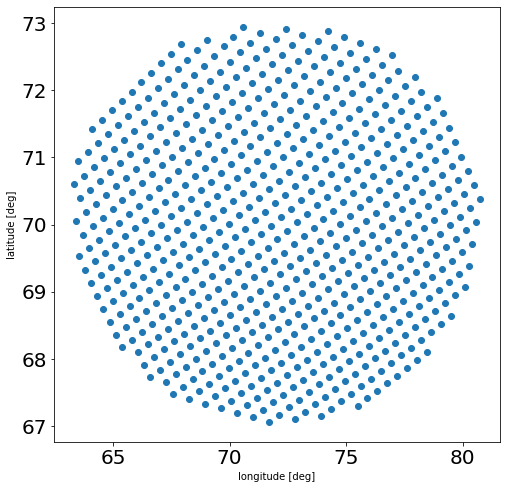

In [4]:
# plot a grid

#latitudes, longitudes = dot_ensemble(np.pi/2-np.pi/8,np.pi/2-np.pi/10,4,num_pts=1e6)
latitudes, longitudes = dot_ensemble(70/180*np.pi,np.pi/2-np.pi/10,3,num_pts=1e6)
plt.figure(figsize=(8,8))
plt.scatter(longitudes/np.pi*180, latitudes/np.pi*180)
#plt.scatter([180/2-180/10],[180/2-180/8],)
plt.xlabel("longitude [deg]")
plt.ylabel("latitude [deg]")
#plt.savefig(f"{CWD}/analysis/plots/model/dot_ensemble.png",dpi=300)

In [5]:
# Plot a model consisting of an ensemble of rotating flaring points on a sphere

I = 71 * np.pi / 180.
phi = np.linspace(0,6*np.pi,2000)
flare = aflare(phi, 3.1, 3., 20,)

lamb, onoff, m = model(phi, latitudes, longitudes, flare, I)

/home/ekaterina/Documents/001_Science/Multiperiod_Flares/analysis/notebooks/funcs/model.py:249: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(-np.tan(l) * np.tan(np.pi/2-i)) / np.pi


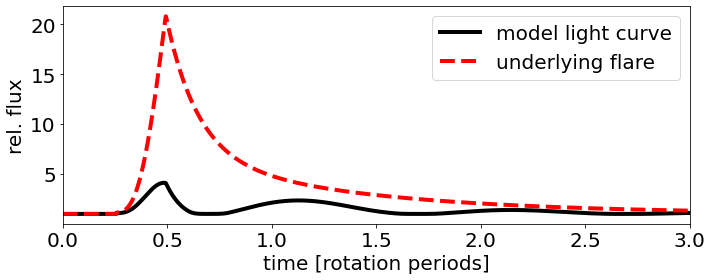

In [7]:
plt.figure(figsize=(10,4))
#for l,oo in zip(lamb,onoff):
#    plt.plot(phi/2/np.pi, l*oo*flare, alpha=.1, c="grey")
plt.plot(phi/2/np.pi,m+1,c="k",linewidth=4, label="model light curve")#,\naverage of individual\ngrid dots (in grey)")
plt.plot(phi/2/np.pi,flare+1, label="underlying flare",c="r",linestyle="dashed",linewidth=4)
plt.xlabel("time [rotation periods]",fontsize=20)
plt.ylabel("rel. flux",fontsize=20)
plt.xlim(0,3)
plt.legend(fontsize=20)
#plt.yscale("log")
plt.tight_layout()
plt.savefig(f"{CWD}/analysis/plots/ddt/lightcurve_l70_i71_linear.png",dpi=300);